In [3]:
# importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
%cd "/content/drive/MyDrive/Tenx program/week-5"

/content/drive/MyDrive/Tenx program/week-5


In [5]:
df = pd.read_csv("data.csv", parse_dates=["TransactionStartTime"])
print(f"{df.shape[0]:,} rows  •  {df.shape[1]} columns")

95,662 rows  •  16 columns


In [6]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionId,95662,95662,TransactionId_35670,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,256.0,256.0,256.0,256.0,256.0,0.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


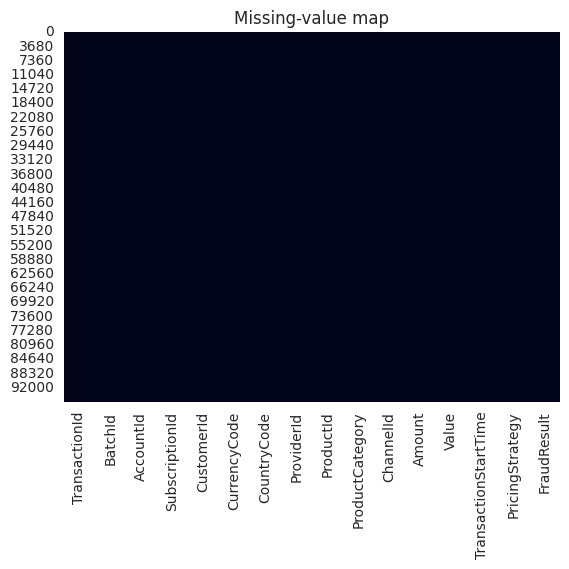

In [10]:
#summary stats & missingness
display(df.describe(include="all").T)
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing-value map"); plt.show()

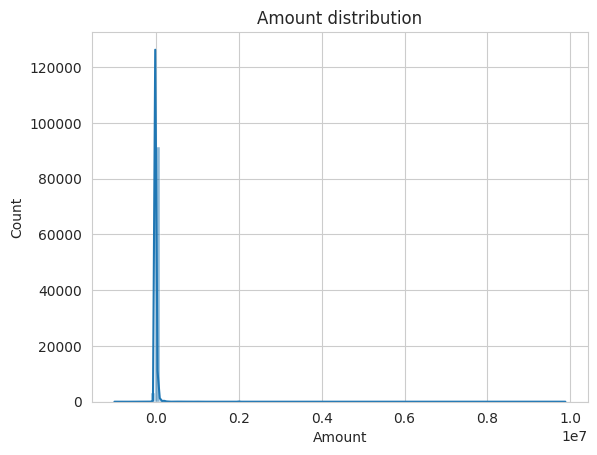

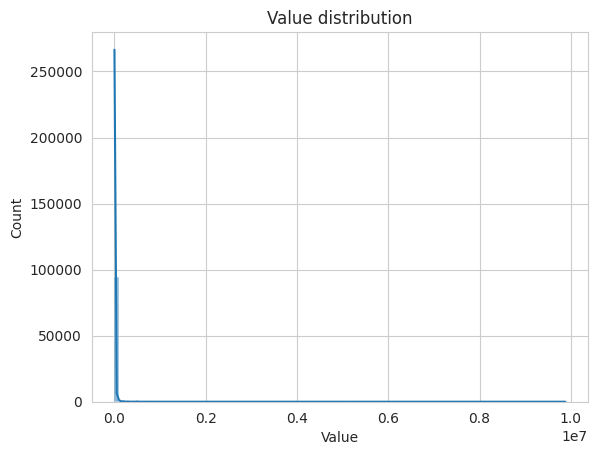

In [11]:
#numerical distributions
num_cols = ["Amount", "Value"]
for col in num_cols:
    sns.histplot(df[col], bins=100, kde=True); plt.title(f"{col} distribution")
    plt.show()


In [12]:
# categorical top-20s
cat_cols = ["ProductCategory", "ChannelId", "CurrencyCode", "FraudResult"]
for col in cat_cols:
    print(f"\n{col}:")
    display(df[col].value_counts(dropna=False).head(20))


ProductCategory:


,count
ProductCategory,
financial_services,45405
airtime,45027
utility_bill,1920
data_bundles,1613
tv,1279
ticket,216
movies,175
transport,25
other,2



ChannelId:


,count
ChannelId,
ChannelId_3,56935
ChannelId_2,37141
ChannelId_5,1048
ChannelId_1,538



CurrencyCode:


,count
CurrencyCode,
UGX,95662



FraudResult:


,count
FraudResult,
0,95469
1,193


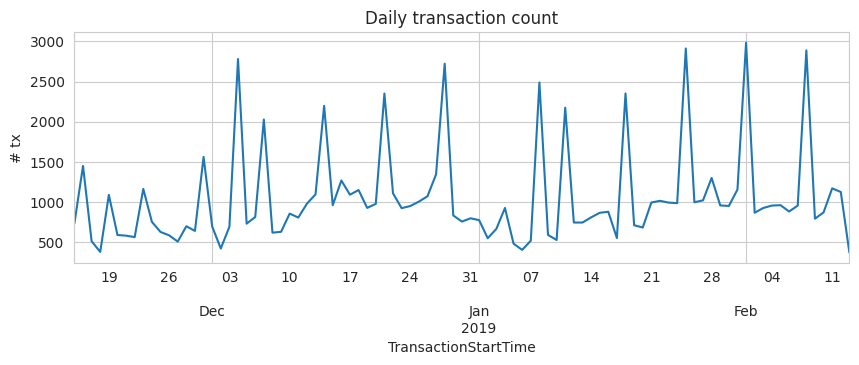

In [13]:
# daily volume
(df
 .set_index("TransactionStartTime")
 .resample("D")["TransactionId"]
 .count()
 .plot(figsize=(10,3)))
plt.title("Daily transaction count"); plt.ylabel("# tx"); plt.show()


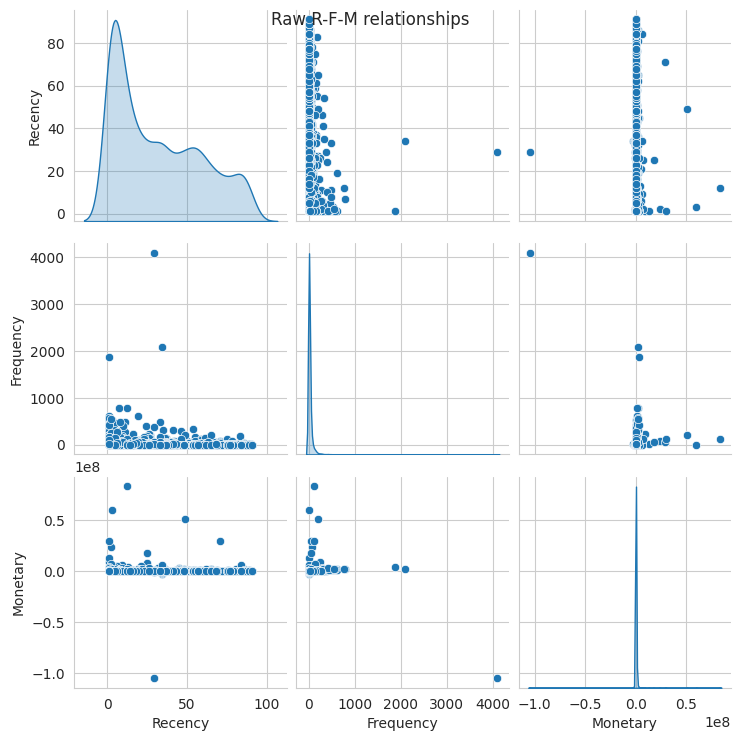

In [14]:
# early RFM probe
snapshot = df["TransactionStartTime"].max() + pd.Timedelta(days=1)
rfm = (df.groupby("CustomerId")
         .agg(Recency   = ("TransactionStartTime", lambda x: (snapshot - x.max()).days),
              Frequency = ("TransactionId", "count"),
              Monetary  = ("Amount", "sum"))
         .reset_index())
sns.pairplot(rfm[["Recency", "Frequency", "Monetary"]], diag_kind="kde")
plt.suptitle("Raw R-F-M relationships"); plt.show()


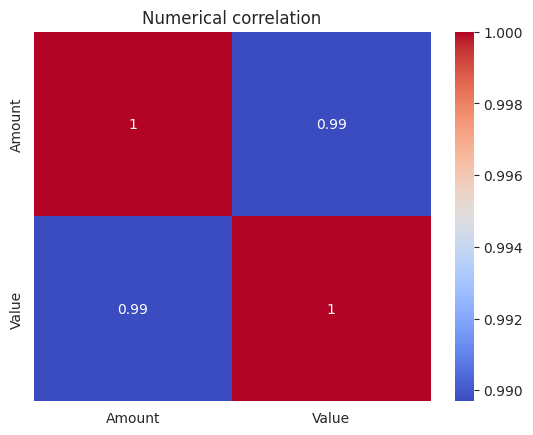

In [15]:
# correlation heat-map
corr = df[["Amount", "Value"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Numerical correlation"); plt.show()

In [16]:
# outlier flag
q_low, q_hi = df["Amount"].quantile([0.01, 0.99])
n_out = df[(df["Amount"] < q_low) | (df["Amount"] > q_hi)].shape[0]
print(f"Extreme ±1 % tails contain {n_out} rows")

Extreme ±1 % tails contain 1395 rows
